# Eigenvalues, Eigenvectors and Change of Basis
Arjun Bhasin

## Linear Transformation

Let $x \in \mathcal{R}^n$ be a vector and let $A \in \mathcal{R}^{n \times n}$ be a square matrix. We are familiar with the rules of matrix multiplication and know that a vector of dimension $n$  can be multiplied by  a square matrix of dimension $n \times n$ to give a resultant vector also of dimension $n$, i.e., 
$$[y]_{n \times 1} = [A]_{n \times n}[x]_{n \times 1}$$
The Matrix $A$ can also be viewed as a Linear Transformation which 'transforms' the vector $x$ in $\mathcal{R}^n$ to a vector $y$ in $\mathcal{R}^n$. 

Let us consider an example in $\mathcal{R}^2$.

Let $A = \left[ \begin{array}{cc} 4 & 2 \\ 1 & 2 \end{array} \right]$ and $x = \left[ \begin{array}{c}1 \\ 0 \end{array} \right]$. Then

$$y = Ax = \left[ \begin{array}{cc} 4 & 2 \\ 1 & 2 \end{array} \right]\left[ \begin{array}{c}1 \\ 0 \end{array} \right] = \left[ \begin{array}{cc} 4 \\ 1 \end{array} \right]$$

In [13]:
%matplotlib notebook

import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from matplotlib import animation

<IPython.core.display.Javascript object>


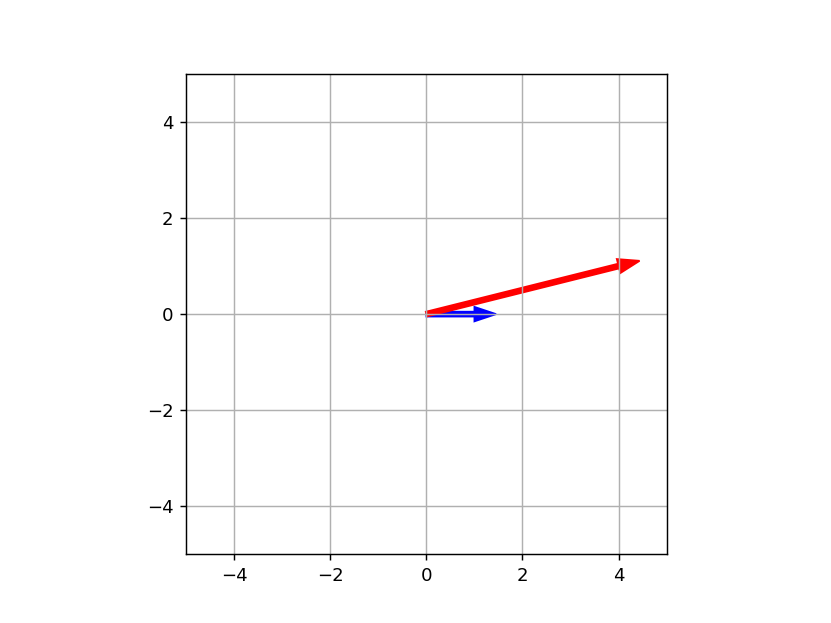

In [14]:
A = np.matrix([[4,2], [1,2]])
x = np.matrix([[1],[0]])

y = A*x

fig1 = plt.figure()
ax1 = plt.axes()

ax1.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
ax1.set_ylim(-5, 5)
ax1.set_xlim(-5, 5)

ax1.arrow(0,0, float(x[0]) , float(x[1]), width=0.1, color='b')
ax1.arrow(0,0, float(y[0]) , float(y[1]), width=0.1, color='r')

plt.show()

<IPython.core.display.Javascript object>


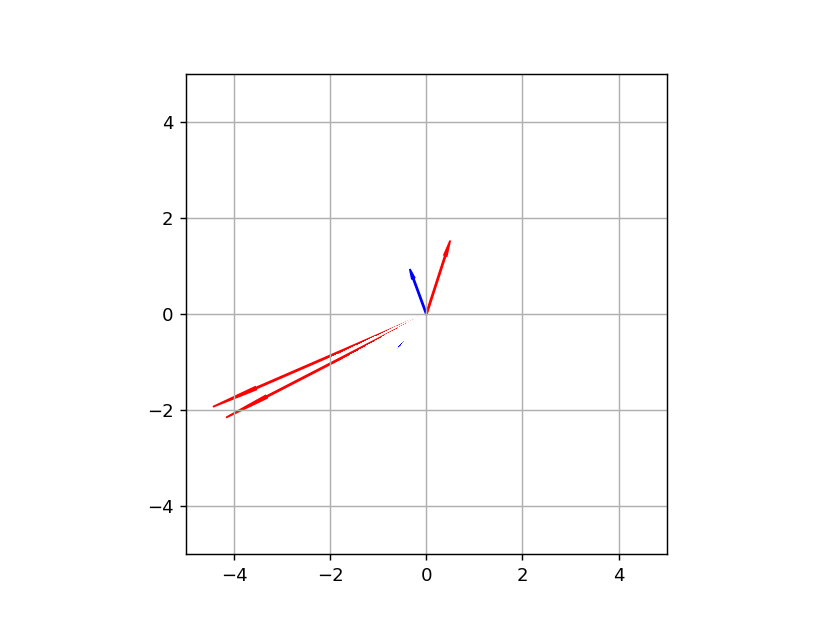

In [15]:
fig = plt.figure()    

ax = plt.axes()
angles = np.linspace(0, 2*np.pi, 50) 
x = []
y = []
for angle in angles:
    vec = np.matrix([[np.cos(angle)], [np.sin(angle)]])
    x.append(vec)
    y.append(A*vec)

N = len(x)

patch1 = patches.Arrow(0, 0, float(x[0][0]), float(x[0][1]), width=0.05, color='b')
patch2 = patches.Arrow(0, 0, float(y[0][0]), float(y[0][1]), width=0.05, color='r')


def init():
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    return patch1,patch2,

def animate(t):
    ax.clear()
    ax.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    ax.set_ylim(-5, 5)
    ax.set_xlim(-5, 5)
    
    patch1 = plt.Arrow(0, 0, float(x[t][0]), float(x[t][1]), width=0.1, color='b')
    patch2 = plt.Arrow(0, 0, float(y[t][0]), float(y[t][1]), width=0.1, color='r')

    ax.add_patch(patch1)
    ax.add_patch(patch2)
    return patch1,patch2,

im_ani = animation.FuncAnimation(fig, animate, init_func=init, interval=300, blit=False, repeat=True, frames=N)

plt.show()

## Eigenvalues

We noticed in the animation above that for certain vectors $x$, on applying the Linear Transformation, the resultant respective vector $y$ is in the same direction as the original vector $x$, only its magnitude may be different. Mathematically we may write this as

$$Ax = \lambda x$$
where $\lambda \in \mathcal{R}$ is a scalar.

In other words, the Linear Transformation gives us the same vector back, only with a different maginitude.


In [16]:
#print (A)
Eig_val, U = np.linalg.eig(A)

u_1 = U[:,0]
u_2 = U[:,1]



## Change of Basis (Vector)

$$\underline{e} =  \{ \mathbf{e_1} , \mathbf{e_2} \}$$
$$\underline{f} =  \{ \mathbf{f_1} , \mathbf{f_2} \}$$




$\underline{e} =  \Bigg\{ \Bigg[ \begin{array}{c}1 \\0 \end{array} \Bigg] ,  \Bigg[ \begin{array}{c}0 \\1 \end{array} \Bigg] \Bigg\}$

$$\mathbf{e_1} = c_{11} \mathbf{f_1} + c_{12} \mathbf{f_2}$$
$$\mathbf{e_2} = c_{21} \mathbf{f_1} + c_{22} \mathbf{f_2}$$

$$ x^{\underline{f}}= C^{\underline{f} \underline{e}} x^{\underline{e}}$$
$$ x^{\underline{e}}= C^{\underline{e} \underline{f}} x^{\underline{f}}$$

$$ C^{\underline{e} \underline{f}} = \left[ \begin{array}{cc}c_{11} & c_{12} \\ c_{21} & c_{22}\end{array} \right]$$

## Change of Basis (Matrix)


$$ A^{\underline{f}\underline{f}} =  C^{\underline{f} \underline{e}} A^{\underline{e}\underline{e}} C^{\underline{e} \underline{f}} $$